# Recommendation System for Venture Capital Investors - Team 4

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
df = pd.read_csv("/Users/Keerthy/Desktop/summer/new/Final_UI/Data/crunchbase-investments.csv", encoding='unicode_escape',low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52870 entries, 0 to 52869
Data columns (total 20 columns):
company_permalink         52869 non-null object
company_name              52869 non-null object
company_category_code     52227 non-null object
company_country_code      52869 non-null object
company_state_code        52378 non-null object
company_region            52869 non-null object
company_city              52337 non-null object
investor_permalink        52868 non-null object
investor_name             52868 non-null object
investor_category_code    2443 non-null object
investor_country_code     40869 non-null object
investor_state_code       36061 non-null object
investor_region           52868 non-null object
investor_city             40390 non-null object
funding_round_type        52867 non-null object
funded_at                 52867 non-null object
funded_month              52867 non-null object
funded_quarter            52867 non-null object
funded_year               52

In [126]:
df.head(10)

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,NaN,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012.0,2000000.0
1,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012.0,20000.0
2,/company/utap,uTaP,messaging,USA,NaN,United States - Other,NaN,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012.0,20000.0
3,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012.0,20000.0
4,/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011.0,20000.0
5,/company/tackk,Tackk,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-02-01,2012-02,2012-Q1,2012.0,20000.0
6,/company/acclaimd,Acclaimd,analytics,USA,OH,Columbus,Columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-06-01,2012-06,2012-Q2,2012.0,20000.0
7,/company/acclaimd,Acclaimd,analytics,USA,OH,Columbus,Columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-08-07,2012-08,2012-Q3,2012.0,70000.0
8,/company/toviefor,ToVieFor,ecommerce,USA,NY,New York,New York,/company/2010-nyu-stern-business-plan-competition,2010 NYU Stern Business Plan Competition,NaN,NaN,NaN,unknown,NaN,angel,2010-04-01,2010-04,2010-Q2,2010.0,75000.0
9,/company/ohk-labs,OHK Labs,sports,USA,FL,Palm Beach,Boca Raton,/company/22hundred-group,22Hundred Group,NaN,NaN,NaN,unknown,NaN,angel,2011-09-01,2011-09,2011-Q3,2011.0,100000.0


##  Data Analysis and Data Visualization 

#### Trends over the year

Text(0.5, 1.0, 'Trends over the year')

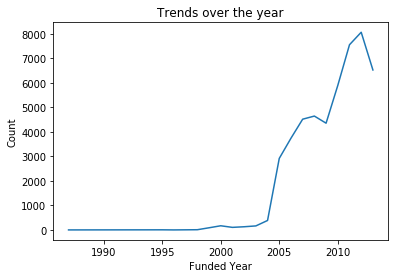

In [127]:
df.raised_amount_usd.groupby(df.funded_year).count().plot(kind='line')
plt.xlabel('Funded Year')
plt.ylabel('Count')
plt.title('Trends over the year')
#plt.xlim(10.5,16.5)

Text(0.5, 1.0, 'Categorization based on type')

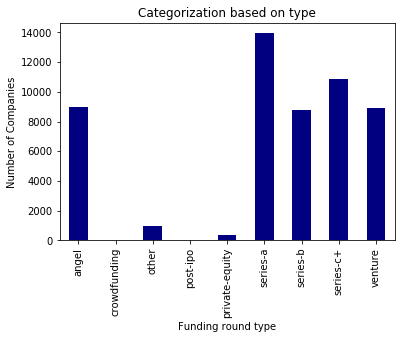

In [128]:
df.funded_year.groupby(df.funding_round_type).count().plot(kind='bar', color = 'navy')
plt.xlabel('Funding round type')
plt.ylabel('Number of Companies')
plt.title('Categorization based on type')

In [129]:
print(df.funded_year.groupby(df.funding_round_type).count())

funding_round_type
angel              8989
crowdfunding          5
other               964
post-ipo             33
private-equity      357
series-a          13938
series-b           8794
series-c+         10870
venture            8917
Name: funded_year, dtype: int64


#### Huge Valued Startups


In [130]:
df.company_name.groupby(df.raised_amount_usd).max().sort_values(ascending=False)

raised_amount_usd
4.300000e+07                            zulily
6.000000e+06                            zulily
8.500000e+07                            zulily
4.600000e+06                            zulily
3.000000e+06                              zozi
1.000000e+07                              zozi
7.000000e+06                              zozi
1.300000e+06                              zozi
1.000000e+06                              ybuy
7.500000e+05                              ybuy
5.000000e+05                          yaM Labs
5.000000e+06                           y prime
7.500000e+06                             xkoto
5.350000e+05                             xkoto
4.000000e+06                               xAd
9.000000e+06                               xAd
1.100000e+07                   woodpellets.com
2.000000e+04                             wmbly
3.000000e+05                   whereIstand.com
2.400000e+05                            weendy
4.000000e+05                           web

#### Preferred Investment Location

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Preffered Investment Location')

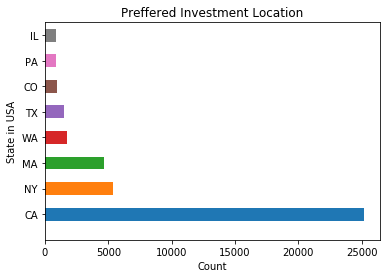

In [131]:
pref_loc = df.raised_amount_usd.groupby(df.company_state_code).count().sort_values(ascending = False).plot(kind='barh')
print(pref_loc)
plt.ylim(-1,7.5)
plt.ylabel('State in USA')
plt.xlabel('Count')
plt.title('Preffered Investment Location')

#### Breakdown of Industries

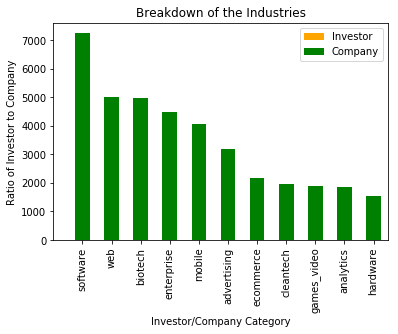

In [132]:
df.investor_category_code.groupby(df.investor_category_code).count().sort_values(ascending = False).plot(kind= 'bar', stacked= True, color='orange', label='Investor')
df.company_category_code.groupby(df.company_category_code).count().sort_values(ascending = False).plot(kind= 'bar', stacked= True, color='green', label ='Company')
plt.legend(loc='upper right')
plt.xlim(-1,10.5)
plt.title('Breakdown of the Industries')
plt.xlabel('Investor/Company Category')
plt.ylabel('Ratio of Investor to Company')
plt.savefig("Industries.png")



In [133]:
df=df.drop(['company_permalink','investor_permalink',
       'investor_category_code',
        'funded_at', 'funded_month', 'funded_quarter',
       'funded_year','investor_state_code','investor_country_code','investor_city','raised_amount_usd'],axis=1)

In [134]:
df.nunique()

company_name             11573
company_category_code       43
company_country_code         2
company_state_code          50
company_region             546
company_city              1229
investor_name            10465
investor_region            585
funding_round_type           9
dtype: int64

In [135]:
df.isnull().sum()

company_name               1
company_category_code    643
company_country_code       1
company_state_code       492
company_region             1
company_city             533
investor_name              2
investor_region            2
funding_round_type         3
dtype: int64

In [136]:
df=df.dropna(axis=0, subset=['company_category_code','company_state_code','company_country_code','company_region','company_city','funding_round_type','company_name','investor_name','investor_region'])

In [137]:
df.isnull().sum()

company_name             0
company_category_code    0
company_country_code     0
company_state_code       0
company_region           0
company_city             0
investor_name            0
investor_region          0
funding_round_type       0
dtype: int64

In [138]:
df.shape

(51468, 9)

In [139]:
df.duplicated().sum()

3824

In [140]:
df = df.drop_duplicates(subset='company_name', keep='first')

In [141]:
df.shape

(11058, 9)

In [142]:
df.duplicated().sum()

0

In [143]:
df1=df

In [144]:
df1.head()

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_region,funding_round_type
0,AdverCar,advertising,USA,CA,SF Bay,San Francisco,1-800-FLOWERS.COM,New York,series-a
1,LaunchGram,news,USA,CA,SF Bay,Mountain View,10Xelerator,Columbus,other
3,ZoopShop,software,USA,OH,Columbus,columbus,10Xelerator,Columbus,angel
4,eFuneral,web,USA,OH,Cleveland,Cleveland,10Xelerator,Columbus,other
5,Tackk,web,USA,OH,Cleveland,Cleveland,10Xelerator,Columbus,other


In [145]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [146]:
df.columns

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type'],
      dtype='object')

## Content Based Recommender System

In [147]:
features = ['company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type']

In [148]:
for feature in features:
    df1[feature] = df1[feature].apply(clean_data)

In [149]:
df1.head()

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_region,funding_round_type
0,AdverCar,advertising,usa,ca,sfbay,sanfrancisco,1-800-flowers.com,newyork,series-a
1,LaunchGram,news,usa,ca,sfbay,mountainview,10xelerator,columbus,other
3,ZoopShop,software,usa,oh,columbus,columbus,10xelerator,columbus,angel
4,eFuneral,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other
5,Tackk,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other


In [150]:
df1.columns

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type'],
      dtype='object')

In [151]:
df['metric'] = df[['company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type']].apply(lambda x: " ".join(x), axis=1)

In [152]:
df1.metric[3]

'software usa oh columbus columbus 10xelerator columbus angel'

In [153]:
df1.columns

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type', 'metric'],
      dtype='object')

In [154]:
df2=df1.drop(['company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type'],axis=1)

In [155]:
df2.head()

,company_name,metric
0,AdverCar,advertising usa ca sfbay sanfrancisco 1-800-fl...
1,LaunchGram,news usa ca sfbay mountainview 10xelerator col...
3,ZoopShop,software usa oh columbus columbus 10xelerator ...
4,eFuneral,web usa oh cleveland cleveland 10xelerator col...
5,Tackk,web usa oh cleveland cleveland 10xelerator col...


In [156]:
from sklearn.feature_extraction.text import CountVectorizer

In [157]:
tf = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df2['metric'])
tfidf_matrix.shape

(11058, 21004)

In [158]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [159]:
cosine_sim[100]

array([4., 1., 1., ..., 9., 9., 1.])

In [160]:
df2= df2.reset_index()
indices = pd.Series(df2.index, index=df2['company_name'])

In [161]:

def get_recommendations(company_name, cosine_sim=cosine_sim):
    idx = indices[company_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    company_indices = [i[0] for i in sim_scores]
    return df['company_name'].iloc[company_indices]

In [162]:
get_recommendations("Rennovia", cosine_sim)

3763            Ceterix Orthopaedics
3733                         Relypsa
3736        KaloBios Pharmaceuticals
3748                        Achaogen
3751                         Igenica
3752            Incline Therapeutics
5055                 Crux Biomedical
5219     Fundamental Applied Biology
5934            Corium International
11011                        NuMedii
Name: company_name, dtype: object

In [163]:
get_recommendations("Relypsa", cosine_sim)

3752        Incline Therapeutics
1595                     Codexis
1785          Pearl Therapeutics
3736    KaloBios Pharmaceuticals
3741                    Rennovia
3748                    Achaogen
3751                     Igenica
3763        Ceterix Orthopaedics
5108               AEGEA Medical
9744        Relievant Medsystems
Name: company_name, dtype: object

## Collaborative Filtering model using KNN 

In [164]:
df=df.dropna(axis=0, subset=['company_name', 'company_category_code', 'company_state_code','funding_round_type'])

In [165]:
df.shape

(11058, 10)

In [166]:
df.columns

Index(['company_name', 'company_category_code', 'company_country_code',
       'company_state_code', 'company_region', 'company_city', 'investor_name',
       'investor_region', 'funding_round_type', 'metric'],
      dtype='object')

In [167]:
df.head(10)

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_region,funding_round_type,metric
0,AdverCar,advertising,usa,ca,sfbay,sanfrancisco,1-800-flowers.com,newyork,series-a,advertising usa ca sfbay sanfrancisco 1-800-fl...
1,LaunchGram,news,usa,ca,sfbay,mountainview,10xelerator,columbus,other,news usa ca sfbay mountainview 10xelerator col...
3,ZoopShop,software,usa,oh,columbus,columbus,10xelerator,columbus,angel,software usa oh columbus columbus 10xelerator ...
4,eFuneral,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other,web usa oh cleveland cleveland 10xelerator col...
5,Tackk,web,usa,oh,cleveland,cleveland,10xelerator,columbus,other,web usa oh cleveland cleveland 10xelerator col...
6,Acclaimd,analytics,usa,oh,columbus,columbus,10xelerator,columbus,angel,analytics usa oh columbus columbus 10xelerator...
8,ToVieFor,ecommerce,usa,ny,newyork,newyork,2010nyusternbusinessplancompetition,unknown,angel,ecommerce usa ny newyork newyork 2010nyusternb...
9,OHK Labs,sports,usa,fl,palmbeach,bocaraton,22hundredgroup,unknown,angel,sports usa fl palmbeach bocaraton 22hundredgro...
10,Lovely,real_estate,usa,ca,sfbay,sanfrancisco,3taps,sfbay,series-a,real_estate usa ca sfbay sanfrancisco 3taps sf...
11,peerTransfer,finance,usa,ma,boston,boston,500hats,sfbay,angel,finance usa ma boston boston 500hats sfbay angel


In [168]:
from sklearn import preprocessing 
  
le = preprocessing.LabelEncoder() 

df.company_category_code = le.fit_transform(df.company_category_code)
df.company_state_code = le.fit_transform(df.company_state_code)
df.funding_round_type= le.fit_transform(df.funding_round_type)

features=list(zip(df.company_category_code,df.company_state_code,df.funding_round_type))

label = le.fit_transform(df.company_name)

In [169]:
df1 = df

df1.company_name = label

In [170]:
df1.head(10)

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_region,funding_round_type,metric
0,307,0,usa,3,sfbay,sanfrancisco,1-800-flowers.com,newyork,5,advertising usa ca sfbay sanfrancisco 1-800-fl...
1,4964,26,usa,3,sfbay,mountainview,10xelerator,columbus,2,news usa ca sfbay mountainview 10xelerator col...
3,10628,37,usa,33,columbus,columbus,10xelerator,columbus,0,software usa oh columbus columbus 10xelerator ...
4,10742,41,usa,33,cleveland,cleveland,10xelerator,columbus,2,web usa oh cleveland cleveland 10xelerator col...
5,9047,41,usa,33,cleveland,cleveland,10xelerator,columbus,2,web usa oh cleveland cleveland 10xelerator col...
6,158,1,usa,33,columbus,columbus,10xelerator,columbus,0,analytics usa oh columbus columbus 10xelerator...
8,9405,7,usa,32,newyork,newyork,2010nyusternbusinessplancompetition,unknown,0,ecommerce usa ny newyork newyork 2010nyusternb...
9,6285,38,usa,8,palmbeach,bocaraton,22hundredgroup,unknown,0,sports usa fl palmbeach bocaraton 22hundredgro...
10,5239,32,usa,3,sfbay,sanfrancisco,3taps,sfbay,5,real_estate usa ca sfbay sanfrancisco 3taps sf...
11,10974,11,usa,18,boston,boston,500hats,sfbay,0,finance usa ma boston boston 500hats sfbay angel


In [171]:
df1.company_name.count()

11058

In [172]:
import random
from sklearn.neighbors import KNeighborsClassifier


#a = random.choice(df.company_category_code)
#b = random.choice(df.company_state_code)
#c = random.choice(df.funding_round_type)


model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(features,label)

#Predict Output
#predicted= model.predict([[a,b,c]]) # 0:Overcast, 2:Mild
predicted= model.predict([[0,3,5]])
print(predicted)

predicted = le.inverse_transform(predicted)
print(predicted)

[232]
['AdRoll']


In [173]:
get_recommendations("Rennovia", cosine_sim)

3763     1782
3733     7557
3736     4751
3748      176
3751     4283
3752     4360
5055     2405
5219     3529
5934     2280
11011    6256
Name: company_name, dtype: int64